In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from scipy.io import arff
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
data = arff.loadarff('Sapfile1.arff')
df = pd.DataFrame(data[0])
df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,b'F',b'G',b'Good',b'Good',b'Vg',b'Good',b'Y',b'Unmarried',b'V',b'Paid',...,b'Um',b'10',b'Farmer',b'Housewife',b'Large',b'Poor',b'Govt',b'Asm',b'Small',b'Good'
1,b'M',b'OBC',b'Vg',b'Vg',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'Um',b'Il',b'Service',b'Service',b'Small',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
2,b'F',b'OBC',b'Good',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'10',b'Service',b'Housewife',b'Average',b'Average',b'Govt',b'Asm',b'Large',b'Good'
3,b'M',b'MOBC',b'Pass',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'Um',b'Business',b'Business',b'Large',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
4,b'M',b'G',b'Good',b'Good',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'10',b'12',b'Service',b'Housewife',b'Large',b'Poor',b'Private',b'Asm',b'Small',b'Good'


In [3]:
for col in df:
    df[col] = df[col].str.decode("utf8")
df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,Unmarried,V,Paid,...,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,...,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,...,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,Unmarried,V,Paid,...,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good


In [4]:
df = df.drop(columns=['ms'], axis=1)
df.head()


,ge,cst,tnp,twp,iap,esp,arr,ls,as,fmi,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,V,Paid,Medium,...,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,V,Paid,Low,...,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,V,Paid,Am,...,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,V,Paid,Medium,...,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,V,Paid,Am,...,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good


In [5]:
X = df.drop(columns=['atd'], axis=1)
y= df['atd']

In [6]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,ge_M,cst_MOBC,cst_OBC,cst_SC,cst_ST,tnp_Good,tnp_Pass,tnp_Vg,twp_Good,twp_Pass,...,nf_Large,nf_Small,sh_Good,sh_Poor,ss_Private,me_Ben,me_Eng,me_Hin,tt_Large,tt_Small
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1


In [7]:
y = (df['atd'] == 'Good').astype(int)
y.head()

0    1
1    0
2    1
3    0
4    1
Name: atd, dtype: int32

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [9]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
scores = cross_val_score(clf_rf, X_train, y_train, cv=2)
print(' score : ' , scores)
y_pred = clf_rf.predict(X_test)
print('accuracy score : ' ,accuracy_score(y_test,y_pred))


 score :  [0.58       0.60416667]
accuracy score :  0.6060606060606061


In [11]:
parameter_grid = {
            'criterion': ['entropy', 'gini'],
            'max_depth': [10, 20, 100],
            'n_estimators': [10, 20, 100]
        }

In [12]:
clf = RandomForestClassifier()
grid_searcher = GridSearchCV(clf, parameter_grid, verbose=2)

In [13]:
grid_searcher.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.1s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.1s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.1s
[CV] criterion=entropy, max_depth=20, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=20 ................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    3.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [14]:
clf_best = grid_searcher.best_estimator_
grid_searcher.best_score_

0.7448979591836735

In [15]:
print('Best params = ', clf_best.get_params())

Best params =  {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [16]:
from sklearn.externals import joblib

# предполагаем что clf - обучен выше
path_to_pkl = os.path.join(os.getcwd(), 'rf_classifier.model')
joblib.dump(clf, path_to_pkl, compress=1)
clf_rf = joblib.load(path_to_pkl)

In [17]:
parameter_grid = {
            'criterion': ['entropy', 'gini'],
            'max_depth': [10, 20, 100],
            'n_estimators': [10, 20, 100]
        }
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
importances = clf_rf.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

[0.030133   0.00230787 0.01793585 0.         0.00290377 0.00687825
 0.05621813 0.0566179  0.03211846 0.01918043 0.02685724 0.0084719
 0.00322789 0.02485813 0.0144739  0.009564   0.0104455  0.00704452
 0.02429566 0.02843547 0.00450404 0.01873054 0.03131783 0.00222222
 0.         0.01874797 0.01524682 0.04270432 0.00656049 0.0137363
 0.02186299 0.01497372 0.00944056 0.01862109 0.         0.01663483
 0.03237029 0.01737909 0.00277778 0.01696201 0.01005974 0.00629442
 0.         0.01937324 0.06277976 0.02340073 0.00823303 0.06087392
 0.01295545 0.00204849 0.05407957 0.01874541 0.01033266 0.02406283]


In [19]:
indices = np.argsort(importances)[::-1]
names = ['ge_M', 'cst_MOBC', 'cst_OBC', 'cst_SC', 'cst_ST', 'tnp_Good',
       'tnp_Pass', 'tnp_Vg', 'twp_Good', 'twp_Pass', 'twp_Vg', 'iap_Good',
       'iap_Pass', 'iap_Vg', 'esp_Good', 'esp_Pass', 'esp_Vg', 'arr_Y', 'ls_V',
       'as_Paid', 'fmi_High', 'fmi_Low', 'fmi_Medium', 'fmi_Vh', 'fs_Large',
       'fs_Small', 'fq_12', 'fq_Degree', 'fq_Il', 'fq_Pg', 'fq_Um', 'mq_12',
       'mq_Degree', 'mq_Il', 'mq_Pg', 'mq_Um', 'fo_Farmer', 'fo_Others',
       'fo_Retired', 'fo_Service', 'mo_Housewife', 'mo_Others', 'mo_Retired',
       'mo_Service', 'nf_Large', 'nf_Small', 'sh_Good', 'sh_Poor',
       'ss_Private', 'me_Ben', 'me_Eng', 'me_Hin', 'tt_Large', 'tt_Small']
names_indices = np.sort(names)[::-1]

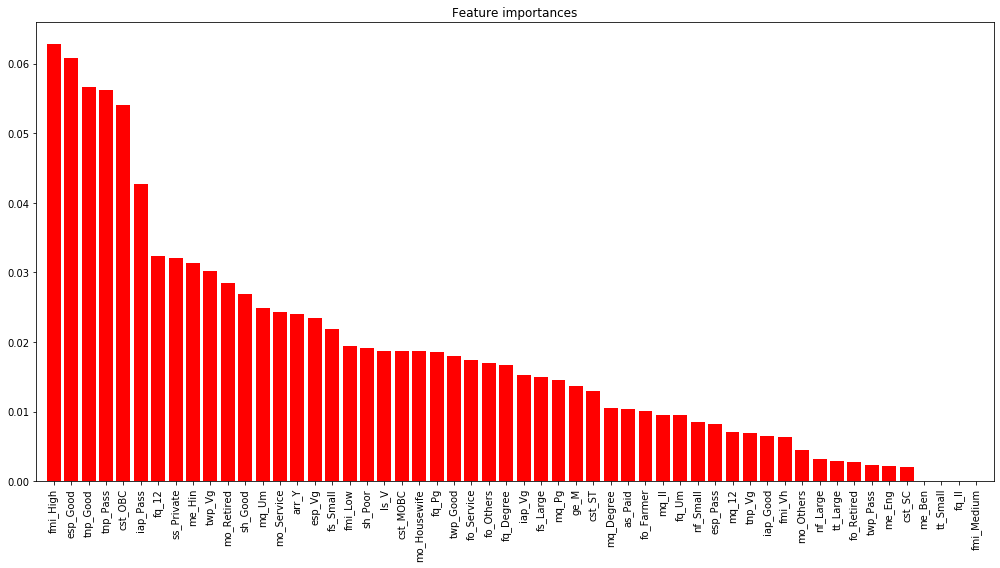

In [20]:
plt.figure(figsize=(14, 8))

plt.title("Feature importances")
 
plt.bar(range(len(importances)), importances[indices], color="r")
plt.xticks(range(len(importances)), names_indices[indices], rotation=90)
 
plt.tight_layout()
plt.xlim([-1, len(importances)])
plt.show()

In [21]:
names_indices[indices]

array(['fmi_High', 'esp_Good', 'tnp_Good', 'tnp_Pass', 'cst_OBC',
       'iap_Pass', 'fq_12', 'ss_Private', 'me_Hin', 'twp_Vg',
       'mo_Retired', 'sh_Good', 'mq_Um', 'mo_Service', 'arr_Y', 'esp_Vg',
       'fs_Small', 'fmi_Low', 'sh_Poor', 'ls_V', 'cst_MOBC',
       'mo_Housewife', 'fq_Pg', 'twp_Good', 'fo_Service', 'fo_Others',
       'fq_Degree', 'iap_Vg', 'fs_Large', 'mq_Pg', 'ge_M', 'cst_ST',
       'mq_Degree', 'as_Paid', 'fo_Farmer', 'mq_Il', 'fq_Um', 'nf_Small',
       'esp_Pass', 'mq_12', 'tnp_Vg', 'iap_Good', 'fmi_Vh', 'mo_Others',
       'nf_Large', 'tt_Large', 'fo_Retired', 'twp_Pass', 'me_Eng',
       'cst_SC', 'me_Ben', 'tt_Small', 'fq_Il', 'fmi_Medium'],
      dtype='<U12')

Уберем часть неважных признаков и уменьшим размер тестовой выборки


In [22]:
new = X.drop(columns= [ 'tt_Small', 'me_Ben', 'me_Eng', 'fo_Farmer', 'fq_Il',
       'iap_Good', 'fmi_Medium', 'fo_Retired', 'nf_Large'], axis=1)
new.head()

,ge_M,cst_MOBC,cst_OBC,cst_SC,cst_ST,tnp_Good,tnp_Pass,tnp_Vg,twp_Good,twp_Pass,...,mo_Housewife,mo_Others,mo_Retired,mo_Service,nf_Small,sh_Good,sh_Poor,ss_Private,me_Hin,tt_Large
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
2,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(new, y, test_size = 0.15, random_state = 0)

In [24]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
scores = cross_val_score(clf_rf, X_train, y_train, cv=2)
print(' score : ' , scores)
y_pred = clf_rf.predict(X_test)
print('accuracy score : ' ,accuracy_score(y_test,y_pred))


 score :  [0.58928571 0.69090909]
accuracy score :  0.8


In [26]:
parameter_grid = {
            'criterion': ['entropy', 'gini'],
            'max_depth': [10, 20, 100],
            'n_estimators': [10, 20, 100]
        }

In [27]:
clf = RandomForestClassifier()
grid_searcher = GridSearchCV(clf, parameter_grid, verbose=2)

In [28]:
grid_searcher.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.1s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.1s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.1s
[CV] criterion=entropy, max_depth=20, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=20 ................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    3.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [29]:
clf_best = grid_searcher.best_estimator_
grid_searcher.best_score_

0.7027027027027027